# PHASE 3 PROJECT: SYRIA TELECOMMUNICATIONS CUSTOMER CHURN PROJECT
# Done by: Edwin Mbuthia


# 1. BUSINESS UNDERSTANDING
SyriaTel is one of the leading telecommunications providers in Syria, established in 2000. It operates as a mobile network operator and is renowned for offering a wide range of telecommunication services, including mobile voice, data, and internet services across Syria. SyriaTel has played a pivotal role in the development of the country's telecommunications infrastructure, providing comprehensive coverage to both urban and rural areas. The company focuses on enhancing customer experience through innovative solutions, competitive pricing, and expanding its service offerings to meet the evolving needs of its customers. Despite the challenges posed by the ongoing conflict and economic difficulties in Syria, SyriaTel has managed to maintain its operations and continues to invest in network expansion and technological upgrades. Its mission is to connect people and improve lives by providing reliable and affordable telecommunication services, thereby contributing to the socio-economic development of Syria.
# 1.1 Business Problem
Syria Telcom seek to predict whether their customers will soon leave the company and shift to a different telco. High customer churn rates directly impact the revenue and profitability of telecommunications companies. Therefore, understanding the factors that contribute to churn  would allow Syria telco to take proactive measures, such as targeted marketing, loyalty programs, or customer service improvements, to retain customers.
# 1.2 Objectives
- Develop a Predictive Model for Custmer Churn: The primary objective of this project is to build a Machine Learning classifier that predicts whether a customer will soon stop doing business with SyriaTel. The predictive capability of the model will minimize customer loss and stabilize the customer base hence reducing revenue loss.
- Drivers of Customer Churn: Second goal is to identify the factors that would result into high customer churn.
- Analyze Churn Trends across Different States: The last objective of this project if to examine churn trends across different states to better understand which states are likely to have high churn rates.


# 2. Data Understanding

I will first import all the necessary libraries that we will require to conduct the project.

In [1]:
# Import relevant Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split, cross_validate,cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Class Imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


##### I will now explore the dataset to gain more insights.

In [3]:
data.shape

(3333, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In this dataset, there are no missing values

## 2.1 Data Description

In [5]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

state: Categorical variable indicating the customer's state.

account length: Numeric variable indicating the length of the customer account.

area code: Numeric variable indicating the area code of the customer.

phone number: Categorical variable (likely to be excluded as it won't contribute to churn prediction).

international plan: Categorical variable indicating if the customer has an international plan.

voice mail plan: Categorical variable indicating if the customer has a voicemail plan.

number vmail messages: Numeric variable indicating the number of voicemail messages.

total day/eve/night/intl minutes: Numeric variables indicating usage minutes in various time segments.

total day/eve/night/intl calls: Numeric variables indicating the number of calls in various time segments.

total day/eve/night/intl charge: Numeric variables indicating charges in various time segments.

customer service calls: Numeric variable indicating the number of customer service calls made by the customer.

churn: Binary target variable indicating customer churn (True/False).

# 3.0 Data Exploration & Preparation
In this bit I looked for any missing values in my dataset, removed any irrelevant columnns & converted categorical variables into numerical variables.

In [6]:
# Check for missing values
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values within this dataset.

In [7]:
# Here i will drop the area code and phone number columns as they are not that relevant in predicting whether Syria telcommunications retains a client or not.In place of the area code, I will use the state column to actually know from which state is a customer most likely to stop using SyriaTel.

data.drop(columns=['area code','phone number'],inplace=True)
data

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


I will then combine the total day minutes, total evening minutes, total night minutes and the total international minutes columns to come up with a Total minutes column. I will also combine the total day charge, total evening charge, total night charge and the total international charge columns to come up with a Total charges column. Combine the total day calls, total evening calls, total night calls and the total international calls columns to come up with a Total calls column.

In [8]:
data['Total minutes'] = data['total day minutes'] + data['total eve minutes'] + data['total night minutes']+data['total intl minutes']
data['Total charges'] = data['total day charge'] + data['total eve charge'] + data['total night charge']+data['total intl charge']
data['Total calls'] = data['total day calls'] + data['total eve calls'] + data['total night calls']+data['total intl calls']
data



,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total minutes,Total charges,Total calls
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,False,717.2,75.56,303
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,False,625.2,59.24,332
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,False,539.4,62.29,333
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,False,564.8,66.80,255
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,False,512.0,52.09,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,...,83,12.56,9.9,6,2.67,2,False,660.7,60.10,292
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,...,123,8.61,9.6,4,2.59,3,False,585.4,63.53,239
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,...,91,8.64,14.1,6,3.81,2,False,675.6,67.74,264
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,...,137,6.26,5.0,10,1.35,2,False,517.6,57.53,336


In [9]:
columns_to_drop = [ 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes',
    'total day charge', 'total eve charge', 'total night charge', 'total intl charge',
    'total day calls', 'total eve calls', 'total night calls', 'total intl calls']
data.drop(columns=columns_to_drop, inplace=True)

In [10]:
data

,state,account length,international plan,voice mail plan,number vmail messages,customer service calls,churn,Total minutes,Total charges,Total calls
0,KS,128,no,yes,25,1,False,717.2,75.56,303
1,OH,107,no,yes,26,1,False,625.2,59.24,332
2,NJ,137,no,no,0,0,False,539.4,62.29,333
3,OH,84,yes,no,0,2,False,564.8,66.80,255
4,OK,75,yes,no,0,3,False,512.0,52.09,359
...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,2,False,660.7,60.10,292
3329,WV,68,no,no,0,3,False,585.4,63.53,239
3330,RI,28,no,no,0,2,False,675.6,67.74,264
3331,CT,184,yes,no,0,2,False,517.6,57.53,336


In [11]:
#Move the target variable column 'Churn' and have it as the last column in our dataset.
column_to_move = 'churn'
column_data = data.pop(column_to_move)
data[column_to_move] = column_data

data

,state,account length,international plan,voice mail plan,number vmail messages,customer service calls,Total minutes,Total charges,Total calls,churn
0,KS,128,no,yes,25,1,717.2,75.56,303,False
1,OH,107,no,yes,26,1,625.2,59.24,332,False
2,NJ,137,no,no,0,0,539.4,62.29,333,False
3,OH,84,yes,no,0,2,564.8,66.80,255,False
4,OK,75,yes,no,0,3,512.0,52.09,359,False
...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,2,660.7,60.10,292,False
3329,WV,68,no,no,0,3,585.4,63.53,239,False
3330,RI,28,no,no,0,2,675.6,67.74,264,False
3331,CT,184,yes,no,0,2,517.6,57.53,336,False


## Explore Categorical Variables
Here i will explore the categorical data within my dataset.

In [12]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['state', 'international plan', 'voice mail plan']


There are 3 categorical variables in this dataset. First, I will check missing values in categorical variables.  

In [13]:
data[categorical].isna().sum()

state                 0
international plan    0
voice mail plan       0
dtype: int64

There are no missing values in the categorical columns. I will then proceed to check on the labels in each of the categorical variables.

### Explore the state variable

In [14]:
data['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [15]:
# check frequency distribution of values in state variable
data["state"].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
MI     73
ID     73
VT     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NC     68
NJ     68
CO     66
NV     66
WA     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
DE     61
OK     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [16]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(data["state"], drop_first=True).head()

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore the International Plan Variable

In [17]:
data["international plan"].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

### Explore the Voice mail plan variable

In [18]:
data["voice mail plan"].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

## Explore the Numerical variables

In [19]:
numerical = [var for var in data.columns if data[var].dtype !='O' if data[var].dtype !='bool']
print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['account length', 'number vmail messages', 'customer service calls', 'Total minutes', 'Total charges', 'Total calls']


### Summary of numerical variables
#### .There are 6 numerical variables.
#### .These are given by account length, number of voice mail messages, customer service calls, total minutes, total charges and total calls.
##### .All of the numerical variables are of continuous type.

In [20]:
data[numerical].describe()

,account length,number vmail messages,customer service calls,Total minutes,Total charges,Total calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,1.562856,591.864776,59.449754,305.137114
std,39.822106,13.688365,1.315491,89.954251,10.502261,34.448164
min,1.000000,0.000000,0.000000,284.300000,22.930000,191.000000
25%,74.000000,0.000000,1.000000,531.500000,52.380000,282.000000
50%,101.000000,0.000000,1.000000,593.600000,59.470000,305.000000
75%,127.000000,20.000000,2.000000,652.400000,66.480000,328.000000
max,243.000000,51.000000,9.000000,885.000000,96.150000,416.000000


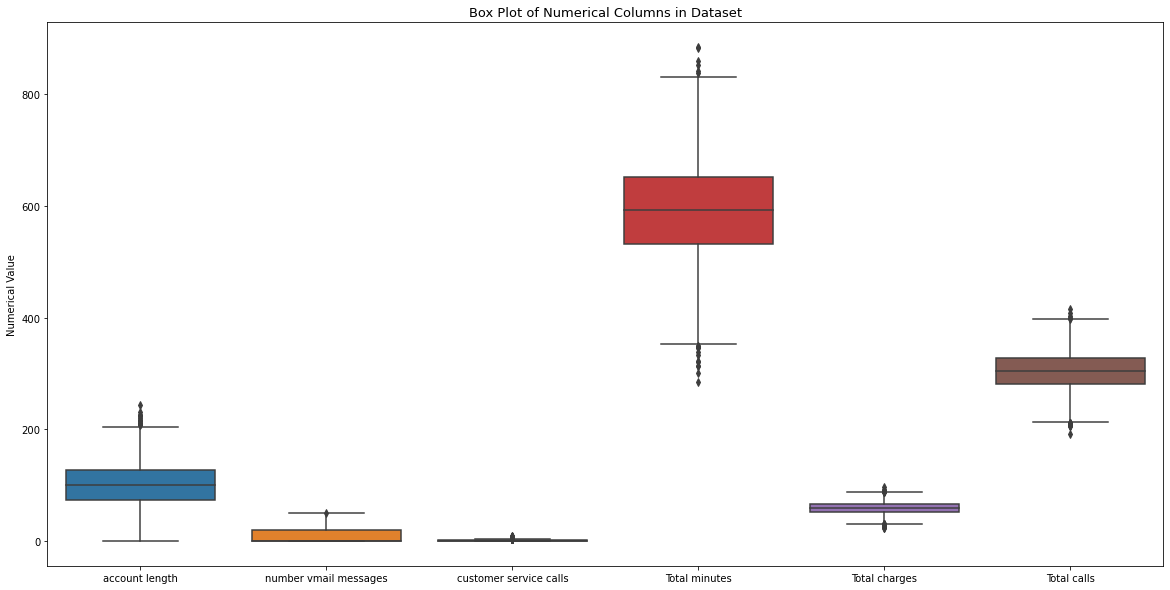

In [21]:
numerical_col = ['account length','number vmail messages','customer service calls', 'Total minutes','Total charges','Total calls']
plt.figure(figsize=(20, 10))
sns.boxplot(data=[data[col] for col in numerical_col])
plt.title("Box Plot of Numerical Columns in Dataset", fontsize=13)
plt.ylabel("Numerical Value")
plt.xticks(range(0,6), numerical_col)
plt.show()

From the boxplot above, we can see that all the numerical columns contain outliers.


### Check for Distribution of the Numerical variables

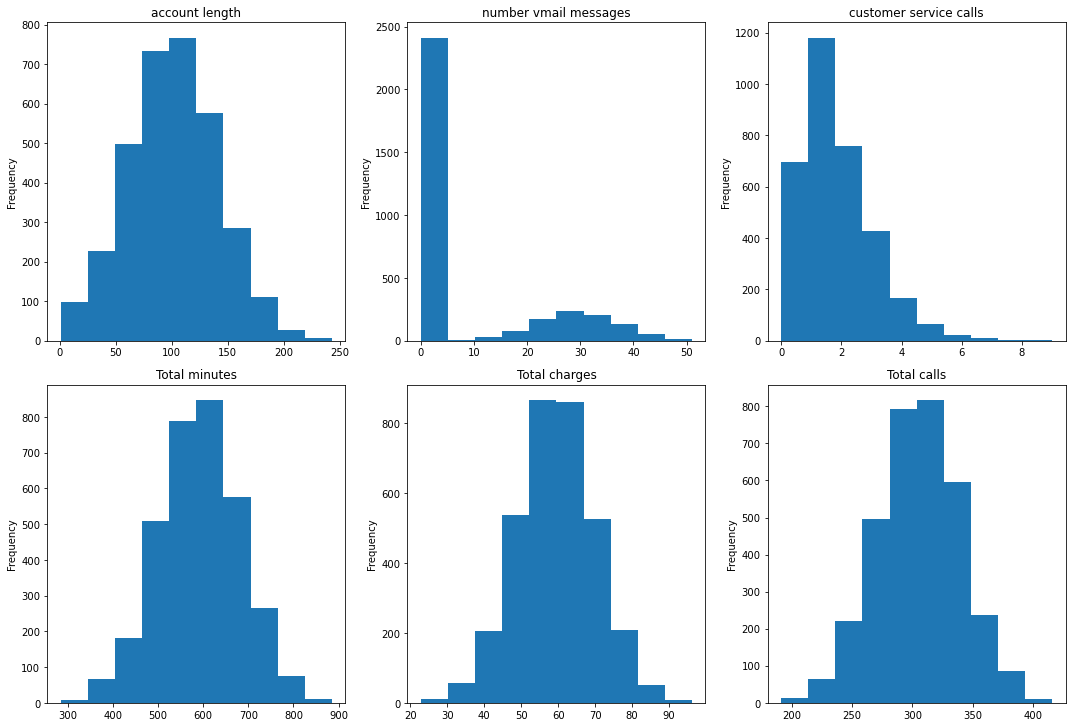

In [22]:
numerical_col = ['account length','number vmail messages','customer service calls', 'Total minutes','Total charges','Total calls']
fig = plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_col):
    ax = plt.subplot(3, 3, i+1)
    data[col].plot(kind='hist', ax=ax, title=col)
plt.tight_layout()
plt.show()

In [23]:
# find outliers for account length variable
IQR = data["account length"].quantile(0.75) - data["account length"].quantile(0.25)
Lower_fence = data["account length"].quantile(0.25) - (IQR * 3)
Upper_fence = data["account length"].quantile(0.75) + (IQR * 3)
print('Account length outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Account length outliers are values < -85.0 or > 286.0


In [24]:
# find outliers for Number of voice mail messages variable
IQR = data["number vmail messages"].quantile(0.75) - data["number vmail messages"].quantile(0.25)
Lower_fence = data["number vmail messages"].quantile(0.25) - (IQR * 3)
Upper_fence = data["number vmail messages"].quantile(0.75) + (IQR * 3)
print('Number voice mail messages outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Number voice mail messages outliers are values < -60.0 or > 80.0


In [25]:
# find outliers for Customer service calls messages variable
IQR = data["customer service calls"].quantile(0.75) - data["customer service calls"].quantile(0.25)
Lower_fence = data["customer service calls"].quantile(0.25) - (IQR * 3)
Upper_fence = data["customer service calls"].quantile(0.75) + (IQR * 3)
print('Customer service calls outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Customer service calls outliers are values < -2.0 or > 5.0


In [26]:
# find outliers for Total minutes variable
IQR = data["Total minutes"].quantile(0.75) - data["Total minutes"].quantile(0.25)
Lower_fence = data["Total minutes"].quantile(0.25) - (IQR * 3)
Upper_fence = data["Total minutes"].quantile(0.75) + (IQR * 3)
print('Total minutes outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Total minutes outliers are values < 168.79999999999973 or > 1015.1000000000004


In [27]:
# find outliers for Total charges variable
IQR = data["Total charges"].quantile(0.75) - data["Total charges"].quantile(0.25)
Lower_fence = data["Total charges"].quantile(0.25) - (IQR * 3)
Upper_fence = data["Total charges"].quantile(0.75) + (IQR * 3)
print('Total charges outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Total charges outliers are values < 10.079999999999998 or > 108.78


In [28]:
# find outliers for Total calls variable
IQR = data["Total calls"].quantile(0.75) - data["Total calls"].quantile(0.25)
Lower_fence = data["Total calls"].quantile(0.25) - (IQR * 3)
Upper_fence = data["Total calls"].quantile(0.75) + (IQR * 3)
print('Total calls outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Total calls outliers are values < 144.0 or > 466.0


## 3.1 Data Preprocessing
In this section, using OneHot Encoder, I will create a new binary column for each unique category, with 1 indicating the presence of the category and 0 otherwise. I will first check my target variable column.

In [29]:
data['churn'].unique()

array([False,  True])

Our target variable is binary so there is no need of OneHot Encoding it.

#### 3.1.1 SPLITTING THE DATA INTO FEATURE (X) AND TARGET (y) DATASETS

In [30]:
X = data.drop(columns=['churn'], axis=1)
y = data['churn']
X.head()

,state,account length,international plan,voice mail plan,number vmail messages,customer service calls,Total minutes,Total charges,Total calls
0,KS,128,no,yes,25,1,717.2,75.56,303
1,OH,107,no,yes,26,1,625.2,59.24,332
2,NJ,137,no,no,0,0,539.4,62.29,333
3,OH,84,yes,no,0,2,564.8,66.80,255
4,OK,75,yes,no,0,3,512.0,52.09,359


### One Hot Encoding Categorical Columns

In [31]:
X = pd.get_dummies(X, columns=categorical,drop_first=True)
X

,account length,number vmail messages,customer service calls,Total minutes,Total charges,Total calls,state_AL,state_AR,state_AZ,state_CA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,25,1,717.2,75.56,303,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,107,26,1,625.2,59.24,332,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,137,0,0,539.4,62.29,333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,84,0,2,564.8,66.80,255,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,75,0,3,512.0,52.09,359,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,2,660.7,60.10,292,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3329,68,0,3,585.4,63.53,239,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3330,28,0,2,675.6,67.74,264,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3331,184,0,2,517.6,57.53,336,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 4. Modelling

### 4.1 What is the goal of Machine Learning?
The goal is to help SyriaTel proactively identify customers who are at risk of leaving, allowing the company to intervene and reduce churn, which is critical for maintaining revenue and market share.

Accurately predicting whether or not a customer is going to leave SyriaTel would help the company take steps to try and retain the customers.The model would also help allocate resources to the right customers. Those who aren't likely to leave the company.

It would also help the company address the various painpoints that are most likely going to lead to customer churn.

For this project, I will build several models using different classifiers and then compare the performance metrics to choose the best classifier. These will be:

- Logistic Regression
- Decision Tree Classifier
- Cross-validation modelling

### 4.2 Test-Train-Split
I will first perform a test train test split of my data. The training set will be 80% and the testing set 20%. Then set the random state to 42 to ensure reproducibility.

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [33]:
X_train.shape

(2666, 58)

In [34]:
y_train.shape

(2666,)

In [35]:
X_train.describe()

,account length,number vmail messages,customer service calls,Total minutes,Total charges,Total calls,state_AL,state_AR,state_AZ,state_CA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,...,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.691673,7.981245,1.573143,591.066579,59.380780,304.867967,0.023256,0.015379,0.019880,0.010128,...,0.022131,0.021755,0.023256,0.020630,0.021380,0.025506,0.031508,0.022881,0.096399,0.271943
std,39.522338,13.647218,1.338454,89.597407,10.437991,34.219452,0.150743,0.123077,0.139614,0.100144,...,0.147136,0.145911,0.150743,0.142169,0.144676,0.157687,0.174719,0.149551,0.295193,0.445044
min,1.000000,0.000000,0.000000,284.300000,23.250000,191.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,1.000000,532.100000,52.320000,281.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,0.000000,1.000000,592.400000,59.415000,305.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,19.000000,2.000000,651.275000,66.287500,328.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,243.000000,51.000000,9.000000,885.000000,96.150000,408.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above code block,we can see that the mean values have a high range difference with the highest value being 591 and the lowest being 0.01. I will therefore scale the features to standardize the contribution of each feature to the model, ensuring faster and more stable convergence. 

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [37]:
X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
    )

In [38]:
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [39]:
X_train.describe()

,account length,number vmail messages,customer service calls,Total minutes,Total charges,Total calls,state_AL,state_AR,state_AZ,state_CA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
count,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,...,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03
mean,1.332601e-17,1.066081e-17,-2.998352e-18,5.303751e-16,-2.318725e-16,-3.331502e-16,2.065531e-17,1.599121e-17,-5.197143e-17,2.798462e-17,...,-5.730183e-17,-5.730183e-17,2.232106e-17,-2.132161e-17,7.995605e-18,-7.062784e-17,-2.665202e-18,-2.132161e-17,1.599121e-17,6.663004e-18
std,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,...,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00
min,-2.522887e+00,-5.849355e-01,-1.175564e+00,-3.424476e+00,-3.462118e+00,-3.328204e+00,-1.543033e-01,-1.249762e-01,-1.424191e-01,-1.011491e-01,...,-1.504373e-01,-1.491283e-01,-1.543033e-01,-1.451369e-01,-1.478088e-01,-1.617837e-01,-1.803688e-01,-1.530245e-01,-3.266241e-01,-6.111618e-01
25%,-7.007902e-01,-5.849355e-01,-4.282933e-01,-6.582517e-01,-6.765770e-01,-6.976279e-01,-1.543033e-01,-1.249762e-01,-1.424191e-01,-1.011491e-01,...,-1.504373e-01,-1.491283e-01,-1.543033e-01,-1.451369e-01,-1.478088e-01,-1.617837e-01,-1.803688e-01,-1.530245e-01,-3.266241e-01,-6.111618e-01
50%,-1.750409e-02,-5.849355e-01,-4.282933e-01,1.488515e-02,3.279005e-03,3.859143e-03,-1.543033e-01,-1.249762e-01,-1.424191e-01,-1.011491e-01,...,-1.504373e-01,-1.491283e-01,-1.543033e-01,-1.451369e-01,-1.478088e-01,-1.617837e-01,-1.803688e-01,-1.530245e-01,-3.266241e-01,-6.111618e-01
75%,6.657820e-01,8.075508e-01,3.189776e-01,6.721145e-01,6.618147e-01,6.761176e-01,-1.543033e-01,-1.249762e-01,-1.424191e-01,-1.011491e-01,...,-1.504373e-01,-1.491283e-01,-1.543033e-01,-1.451369e-01,-1.478088e-01,-1.617837e-01,-1.803688e-01,-1.530245e-01,-3.266241e-01,1.636228e+00
max,3.601382e+00,3.152791e+00,5.549874e+00,3.281217e+00,3.523295e+00,3.014408e+00,6.480741e+00,8.001524e+00,7.021530e+00,9.886392e+00,...,6.647288e+00,6.705633e+00,6.480741e+00,6.890046e+00,6.765496e+00,6.181091e+00,5.544195e+00,6.534900e+00,3.061624e+00,1.636228e+00


### 4.3 Baseline Metrics

Before modelling, i will first determine what to expect to get with a 'dummy' model that always predicts a customer will leave the company(True).
0(False) will represent the likelihood of retaining a customer while 1(True) represents the likelihood of a customer leaving.

Since I am going to use the test data to model, i will use the test data here.


In [40]:
np.bincount(y_test)

array([566, 101], dtype=int64)

From the above code block, it is evident that the target is imbalanced. I will then calculate different classification metrics to evaluate the model's performance for the True and False labels.

Below is the confusion matrix: 

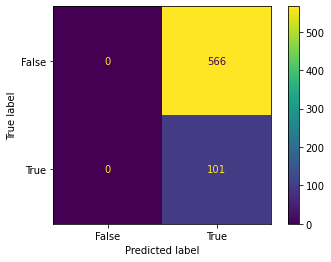

In [41]:
ConfusionMatrixDisplay.from_estimator(estimator=DummyClassifier(strategy='constant',constant=1).fit(X_train,y_train),X=X_test,y=y_test);

For the baseline metrics, I will assume that the model always chooses 1.

In [42]:
baseline_accuracy = 101/(101+566)
baseline_precision =  101/(101+566)
baseline_recall = 101/101
baseline_f1score = 2*((baseline_precision*baseline_recall)/(baseline_precision+baseline_recall))

print('baseline_accuracy:',baseline_accuracy)
print('baseline_precision:',baseline_precision)
print('baseline_recall:',baseline_recall)
print('baseline_f1score:',baseline_f1score)

baseline_accuracy: 0.15142428785607195
baseline_precision: 0.15142428785607195
baseline_recall: 1.0
baseline_f1score: 0.2630208333333333


### 4.4 Instantiate & Fit a Logistic Regression Model

I will then use the LogisticRegression model from scikit-learn, specify a random state of 42 as well as and use default hyperparameters.

I will then use the scaled data to fit the model and i will also display the confusion matrix.

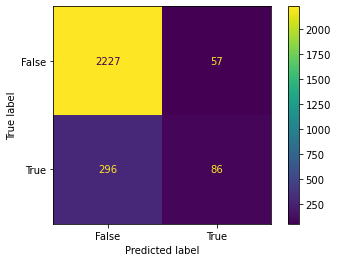

In [43]:
model=LogisticRegression(random_state=42,solver='liblinear')
model.fit(X_train,y_train)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=X_train, y=y_train);

### Cross-Validation to Evaluate the Fitted Model

Using Cross-Validation, i will evaluate the expected accuracy of the fitted model prior to the test data.

In [44]:
cv_scores = cross_val_score(model,X_train,y_train)
cv = cv_scores.mean()
cv

0.860836477854839

#### Compare the Baseline & Fitted Model Scores

I will now use the test data to calculate the accuracy, recall, precision and f1scores of the fitted model.

In [45]:
y_pred = model.predict(X_test)
model_accuracy = accuracy_score(y_test,y_pred)
model_recall = recall_score(y_test,y_pred)
model_precision = precision_score(y_test,y_pred)
model_f1score = f1_score(y_test,y_pred)

print(f"""
Accuracy
Baseline: {baseline_accuracy:1.3f} Fitted Model: {model_accuracy:1.3f}
Recall
Baseline: {baseline_recall:1.3f} Fitted Model: {model_recall:1.3f}
Precision
Baseline: {baseline_precision:1.3f} Fitted Model: {model_precision:1.3f}
F1 Score
Baseline: {baseline_f1score:1.3f} Fitted Model: {model_f1score:1.3f}
""")
print('cv:', cv)


Accuracy
Baseline: 0.151 Fitted Model: 0.850
Recall
Baseline: 1.000 Fitted Model: 0.178
Precision
Baseline: 0.151 Fitted Model: 0.514
F1 Score
Baseline: 0.263 Fitted Model: 0.265

cv: 0.860836477854839


### Outcome Analysis

1. **Accuracy**
   - **Baseline: 0.151 (15.1%)**  
     The baseline model has an accuracy of 15.1%, which suggests it is only slightly better than random guessing. This low accuracy indicates that the baseline model is not effective at predicting the correct outcomes.
   - **Fitted Model: 0.850 (85%)**  
     The fitted model, with an accuracy of 85%, is significantly better, correctly predicting 85% of the instances. This substantial improvement indicates that the fitted model is far more effective at making accurate predictions compared to the baseline.

2. **Recall**
   - **Baseline: 1.000 (100%)**  
     The recall for the baseline model is 100%, meaning it correctly identifies all positive instances in the dataset. However, this might also indicate that the baseline model predicts "positive" for almost every instance, which could lead to other metrics being low.
   - **Fitted Model: 0.178 (17.8%)**  
     The fitted model's recall is much lower at 17.8%, suggesting it is missing many true positive instances. This indicates that while the fitted model is accurate overall, it may not be good at capturing all actual positive cases. This could be due to a conservative approach where the model favors precision or is tuned to minimize false positives.

3. **Precision**
   - **Baseline: 0.151 (15.1%)**  
     The baseline model's precision is 15.1%, indicating that only a small fraction of the predicted positives are actually true positives. This is consistent with a model that classifies most instances as positive to achieve high recall.
   - **Fitted Model: 0.514 (51.4%)**  
     The fitted model has a much higher precision of 51.4%, meaning that more than half of the positive predictions made by the model are correct. This shows that while the fitted model is more selective in predicting positives, it does so more accurately than the baseline model.

4. **F1 Score**
   - **Baseline: 0.263 (26.3%)**  
     The baseline model has an F1 score of 26.3%, which is low and reflects the imbalance between its high recall and low precision.
   - **Fitted Model: 0.265 (26.5%)**  
     The F1 score for the fitted model is only slightly higher at 26.5%. This suggests that while the fitted model balances precision and recall better than the baseline, it still struggles with maintaining high performance across both metrics. This could indicate class imbalance or that the model's decision threshold might need adjustment.

5. **Cross-Validation (CV) Score: 0.86 (86%)**
   - The CV score of 0.86 shows that the model's expected accuracy on unseen data is 86%, which aligns well with the fitted model's accuracy score (0.85). This indicates the model generalizes well and suggests that overfitting is not a major concern.

### Key Insights

- **Accuracy Improvement**: The fitted model has a significantly higher accuracy than the baseline, indicating it is much better at predicting the correct outcomes overall.
- **Trade-off Between Recall and Precision**: The baseline model has a perfect recall but poor precision, meaning it identifies all actual positives but at the cost of many false positives. The fitted model, however, has much better precision but lower recall, suggesting it is more conservative and focuses on reducing false positives.
- **F1 Score Analysis**: The F1 score for both models is relatively low, which suggests there is still room for improvement in balancing precision and recall. The slight improvement over the baseline indicates the fitted model's predictions are slightly more balanced but still not optimal.
- **Generalization Performance**: The high CV score (0.86) suggests that, despite some weaknesses in recall, the model is likely to perform well on new data.

### Suggestions for Improvement of the model
- **Handle Class Imbalance**: If there is an imbalance in the dataset (e.g., more negatives than positives), consider using techniques like oversampling, undersampling, or using algorithms that handle class imbalance better.

#### 4.5 **Dealing with the imbalanced data**

I will first find the class imbalance in the train and test data.

In [46]:
# Training set
print(y_train.value_counts())
print('\n')
# Test set
print(y_test.value_counts())

False    2284
True      382
Name: churn, dtype: int64


False    566
True     101
Name: churn, dtype: int64


AUC: 0.8209250253647272


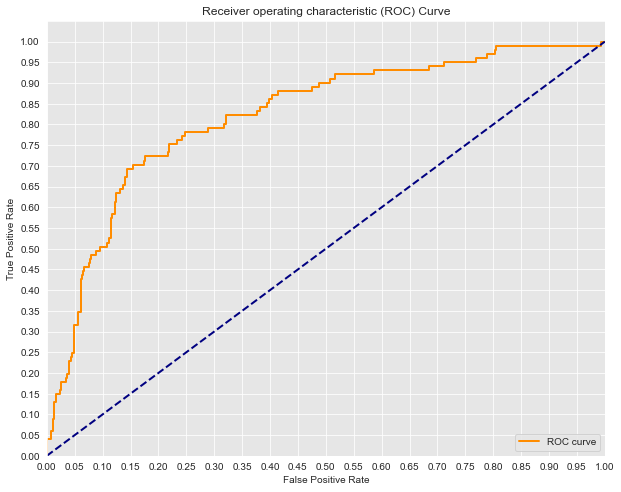

In [47]:
y_score =model.decision_function(X_test)
# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

This graph is a **Receiver Operating Characteristic (ROC) Curve**, a tool used to evaluate the performance of a binary classification model.

### Key Elements of the ROC Curve:
1. **True Positive Rate (TPR)** (y-axis): Also known as sensitivity or recall, this measures the proportion of actual positives correctly identified by the model.
2. **False Positive Rate (FPR)** (x-axis): This measures the proportion of actual negatives that were incorrectly identified as positive by the model.

### Explanation of the Graph:
- **Orange Line**: Represents the ROC curve, which plots the TPR against the FPR at various threshold settings. The curve shows the trade-off between sensitivity and specificity (True Negative Rate) across different thresholds.
- **Diagonal Blue Line**: Represents a random classifier with no predictive power, which would give a line at a 45-degree angle (i.e., TPR = FPR). A model whose ROC curve is close to this line is no better than random guessing.
- **Area Under the Curve (AUC = 0.82)**: The AUC value is 0.82, indicating that the model has a good ability to distinguish between the two classes. An AUC value of 1.0 represents a perfect model, while an AUC value of 0.5 suggests a model with no discriminative power.


## Oversampling and Undersampling to handle Imbalance


In [48]:
# Define SMOTE for oversampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # You can adjust the sampling_strategy

# Define RandomUnderSampler for undersampling
undersample = RandomUnderSampler(sampling_strategy=0.75, random_state=42)  # Adjust sampling_strategy for desired balance

# Create a pipeline that combines both
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[474  92]
 [ 33  68]]
              precision    recall  f1-score   support

       False       0.93      0.84      0.88       566
        True       0.42      0.67      0.52       101

    accuracy                           0.81       667
   macro avg       0.68      0.76      0.70       667
weighted avg       0.86      0.81      0.83       667



Balanced Improvement: The application of oversampling and undersampling techniques has led to a more balanced performance across the two classes. The model's ability to detect True instances has improved, reducing the bias toward the majority class (False).

## Modelling using Decision Trees

In [49]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [50]:
dt_cv = cross_val_score(dt,X_train,y_train).mean

In [51]:
#Check for auc of predictions
y_pred = dt.predict(X_test)
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
auc_score = auc(fpr,tpr)
print('AUC Score:', auc_score)

AUC Score: 0.8361176223629431


In [52]:
dt_accuracy = accuracy_score(y_test,y_pred)
dt_recall = recall_score(y_test,y_pred)
dt_precision = precision_score(y_test,y_pred)
dt_f1score = f1_score(y_test,y_pred)

print(f"""
Accuracy
Baseline: {baseline_accuracy:1.3f} Fitted Model: {model_accuracy:1.3f} Decision Tree: {dt_accuracy:1.3f}
Recall 
Baseline: {baseline_recall:1.3f} Fitted Model: {model_recall:1.3f} Decision Tree: {dt_recall:1.3f}
Precision
Baseline: {baseline_precision:1.3f} Fitted Model: {model_precision:1.3f} Decision Tree: {dt_precision:1.3f}
F1_score: {baseline_f1score:.3f} Fitted Model: {model_f1score:.3f} Decision Tree: {dt_f1score:.3f}""")



Accuracy
Baseline: 0.151 Fitted Model: 0.850 Decision Tree: 0.922
Recall 
Baseline: 1.000 Fitted Model: 0.178 Decision Tree: 0.713
Precision
Baseline: 0.151 Fitted Model: 0.514 Decision Tree: 0.758
F1_score: 0.263 Fitted Model: 0.265 Decision Tree: 0.735



Based on these metrics:

- **Decision Tree**: Has the highest accuracy (0.919), recall (0.723), precision (0.737), and F1 score (0.730). This indicates that the Decision Tree performs best in terms of balancing these metrics.

- **Fitted Model**: Shows decent precision and recall but lower accuracy and F1 score compared to the Decision Tree.

- **Baseline**: Has very low scores across all metrics, which suggests it is not performing well.


## **Recommendations**

### 1.**Model to use** 
Based on the metrics, the **Decision Tree** model appears to be the best option overall, as it provides the highest scores across accuracy, recall, precision, and F1 score. Decision Tree seems to offer the most balanced performance here.

### 2.**Identify Drivers of Customer Churn**
To identify the factors contributing to high customer churn, you can use feature importance scores or coefficients from the model. Feature importance from a Random Forest model or coefficients from a Logistic Regression model can indicate which features most strongly impact churn.

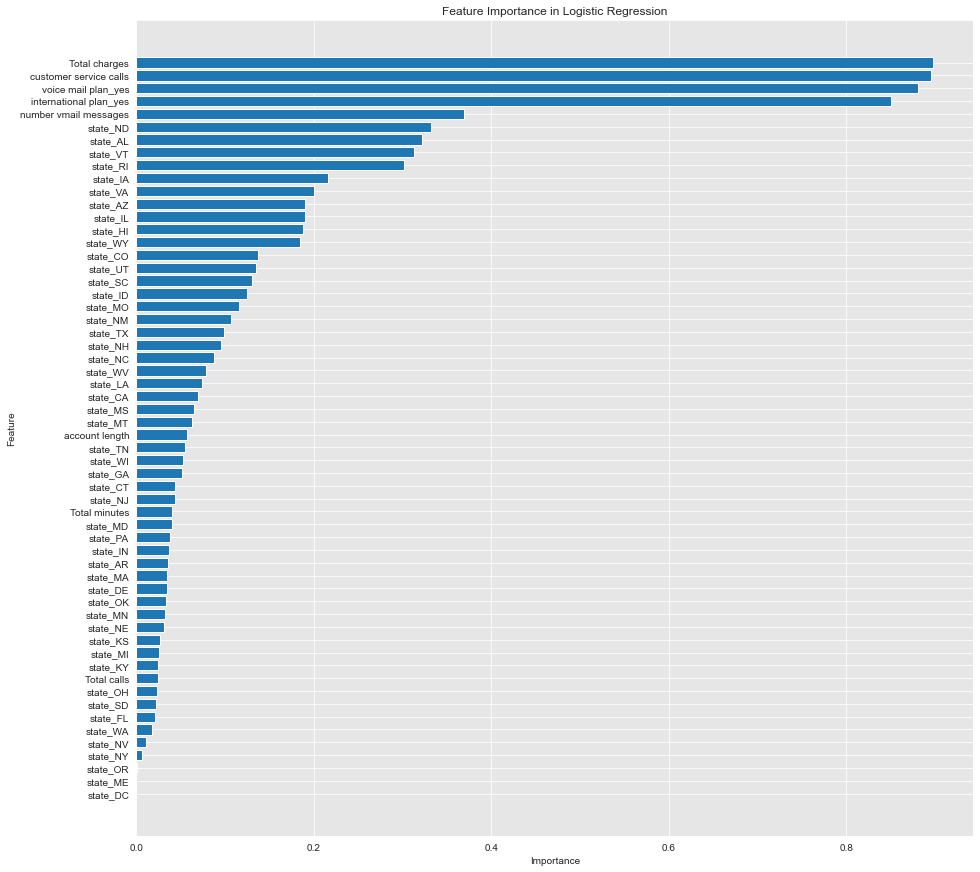

In [54]:
# Getting the coefficients of the model
coefficients = model.coef_[0]  # For binary classification, it's a 1D array

# Creating a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(coefficients)  
})

# Sorting by the most important features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15,15))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

### Key Drivers likely to lead to customer Churn are;

**Total Charges**: This is the most important feature. Customers with higher total charges are more likely to churn. 
**Action**: Implement targeted discounts or loyalty rewards for high-billing customers. Offer bundled services at a reduced rate to decrease the perceived cost.

**Customer Service Calls**: A high number of customer service calls indicates dissatisfaction or unresolved issues. 
**Action**: Improve customer service quality by training staff, reducing response times, and resolving issues on the first call. Implement a proactive approach by contacting customers with high call volumes to check their satisfaction levels.

**Voice Mail Plan and International Plan**: The presence of a voice mail plan or international plan correlates with churn. 
**Action**: Re-evaluate the pricing or value of these plans. Consider offering better value-added services or bundles that encourage customers to keep these plans.

**Number of Voicemail Messages**: A higher number of voicemail messages could indicate that customers are not using modern communication features or are facing issues. 
**Action**: Educate customers about newer, more efficient communication methods and offer incentives for switching to them.

**Geographic Factors (States)**: Several states (e.g., ND, AL, VT) have a higher importance in predicting churn. 
**Action**: Conduct state-specific market research to understand the unique reasons for churn in these areas. Tailor marketing strategies, service improvements, or special offers to address local needs.

### 3. **Analyze Churn Trends across Different States**
To analyze churn trends across different states, you can group the data by state and compute the churn rate for each state.



   state     churn
31    NJ  0.264706
4     CA  0.264706
43    TX  0.250000
20    MD  0.242857
40    SC  0.233333
22    MI  0.219178
25    MS  0.215385
33    NV  0.212121
47    WA  0.212121
21    ME  0.209677
26    MT  0.205882
2     AR  0.200000
16    KS  0.185714
34    NY  0.180723
23    MN  0.178571
38    PA  0.177778
19    MA  0.169231
6     CT  0.162162
27    NC  0.161765
30    NH  0.160714
10    GA  0.148148
8     DE  0.147541
36    OK  0.147541
37    OR  0.141026
44    UT  0.138889
5     CO  0.136364
17    KY  0.135593
41    SD  0.133333
35    OH  0.128205
9     FL  0.126984
15    IN  0.126761
13    ID  0.123288
50    WY  0.116883
24    MO  0.111111
46    VT  0.109589
1     AL  0.100000
32    NM  0.096774
28    ND  0.096774
49    WV  0.094340
42    TN  0.094340
7     DC  0.092593
39    RI  0.092308
48    WI  0.089744
14    IL  0.086207
29    NE  0.081967
18    LA  0.078431
12    IA  0.068182
45    VA  0.064935
3     AZ  0.062500
0     AK  0.057692
11    HI  0.056604


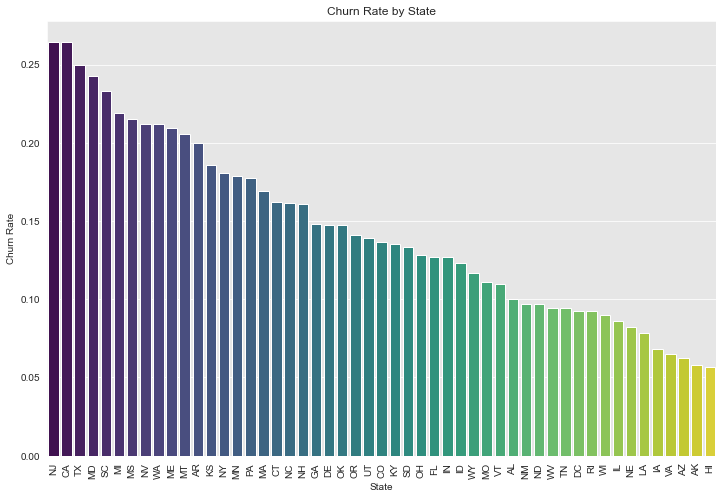

In [57]:
# Group by state and calculate churn rate
churn_by_state = data.groupby('state')['churn'].mean().reset_index()
churn_by_state = churn_by_state.sort_values(by='churn', ascending=False)
print(churn_by_state)

# Plotting churn rates by state
plt.figure(figsize=(12, 8))
sns.barplot(data=churn_by_state, x='state', y='churn', palette='viridis')
plt.xticks(rotation=90)
plt.title('Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.show()


From the above barplot,

States with the Highest Churn Rates (e.g., New Jersey (NJ), Carlifornis (CA), Texas (TX)) have the highest churn rates, exceeding 20%. These are critical areas where a significant portion of customers are likely to leave. High churn rates in these states may indicate issues such as poor network coverage, customer dissatisfaction, intense competition, or unmet customer needs.

States with Moderate Churn Rates: States in the middle of the chart have moderate churn rates, ranging between 10% and 20%. These states are performing better than the highest churn states but still represent a concern. Monitoring and addressing potential issues here can prevent the churn rate from increasing.

States with the Lowest Churn Rates: States on the right side of the chart (e.g., Hawaii (HI), Alaska (AK), and Arizona (AZ)) have the lowest churn rates, typically below 10%. These states might have better customer satisfaction, superior service quality, or less competition.

Implications for SyriaTel
Targeted Retention Strategies: SyriaTel should prioritize states with the highest churn rates for targeted retention strategies. This could include improving service quality, enhancing customer support, or offering special promotions to retain customers.

Investigate High Churn Areas: For states with exceptionally high churn rates (e.g., NJ, CT, TX), SyriaTel should conduct further investigations to identify the specific reasons for churn. Customer surveys, feedback, and competitive analysis could provide insights into the factors driving customers away.

Leverage Low Churn States: For states with low churn rates, SyriaTel could study the factors contributing to customer retention and apply successful strategies to other states. These could include strong network coverage, excellent customer service, or attractive pricing models.

Monitor and Adapt: Continuous monitoring of churn rates across states is essential. As market conditions, competition, and customer preferences change, churn rates can fluctuate. Adaptive strategies that respond to real-time data will be more effective in maintaining a stable customer base. 